In [2]:
# Import necessary library
import numpy as np
import pandas as pd

# Load the dataset (assuming 'mcdonalds' is available as a CSV or similar file in the working directory)
# Replace "path_to_file.csv" with the actual path to your dataset
mcdonalds = pd.read_csv("/content/mcdonalds.csv")

# Display column names
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [3]:
# Display the dimensions of the DataFrame
mcdonalds.shape


(1453, 15)

In [4]:
# Display the first 3 rows of the DataFrame
mcdonalds.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
# Select the first 11 columns and convert them to a matrix-like structure (numpy array)
MD_x = mcdonalds.iloc[:, :11].values

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = np.round(MD_x.mean(axis=0), 2)

print(col_means)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [6]:
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Display summary: explained variance for each principal component
explained_variance = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

print(explained_variance)
print("\nTotal Explained Variance:", sum(pca.explained_variance_ratio_))


   Principal Component  Explained Variance Ratio
0                  PC1                  0.299447
1                  PC2                  0.192797
2                  PC3                  0.133045
3                  PC4                  0.083096
4                  PC5                  0.059481
5                  PC6                  0.050300
6                  PC7                  0.043849
7                  PC8                  0.039548
8                  PC9                  0.036761
9                 PC10                  0.032353
10                PC11                  0.029323

Total Explained Variance: 1.0000000000000002


In [7]:
# Convert the PCA components to a DataFrame for better readability
pca_components = pd.DataFrame(MD_pca.components_, columns=[f'PC{i+1}' for i in range(MD_pca.components_.shape[1])])

# Round to 1 decimal place and print
print(pca_components.round(1))


    PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
0   0.5  0.2  0.0 -0.1 -0.3  0.1  0.3  0.5 -0.3   0.2  -0.4
1  -0.4 -0.0 -0.0  0.0  0.1  0.1  0.6 -0.3 -0.6  -0.1   0.1
2   0.3  0.1  0.0  0.3  0.8  0.1  0.1  0.3 -0.0  -0.2   0.1
3   0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.0  0.1   0.8   0.4
4   0.3 -0.3 -0.1  0.1 -0.4 -0.1  0.1  0.2  0.0  -0.3   0.7
5  -0.2  0.3  0.4  0.4 -0.2  0.6  0.1  0.1  0.3   0.2   0.2
6  -0.3 -0.1  0.7 -0.4  0.0 -0.1 -0.0  0.4 -0.1  -0.3  -0.0
7  -0.0  0.1 -0.4 -0.6  0.1  0.6 -0.1  0.1 -0.0  -0.2   0.2
8  -0.6  0.0 -0.4  0.2  0.0 -0.2 -0.1  0.6 -0.1   0.2   0.1
9   0.1  0.7  0.1  0.0 -0.0 -0.2 -0.4 -0.1 -0.5   0.0   0.3
10 -0.0  0.5 -0.1 -0.3 -0.0 -0.3  0.5 -0.0  0.5  -0.2   0.0


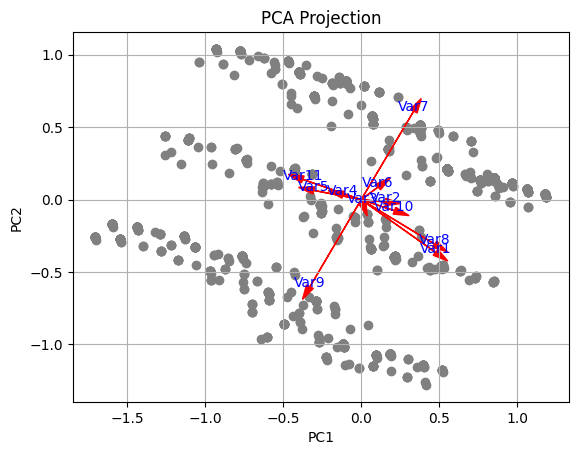

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the PCA projection
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')

# Plot the projection axes (equivalent to projAxes in R)
for i, (comp_x, comp_y) in enumerate(MD_pca.components_[:2, :].T):  # Only plot the first two PCs for a 2D plot
    plt.arrow(0, 0, comp_x, comp_y, color='red', head_width=0.05, head_length=0.1)
    plt.text(comp_x, comp_y, f"Var{i+1}", color="blue", ha="center")

plt.grid()
plt.show()


In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Set the random seed for reproducibility
np.random.seed(1234)

# Function to find the optimal clustering with the lowest inertia (similar to stepFlexclust)
def step_kmeans(data, k_range, n_init=10):
    best_inertia = float('inf')
    best_model = None
    models = []

    for k in k_range:
        # Run KMeans with `n_init` different random initializations
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        kmeans.fit(data)

        models.append(kmeans)

        # Keep track of the model with the lowest inertia
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_model = kmeans

    return best_model, models

# Perform clustering for k values from 2 to 8
best_kmeans, all_models = step_kmeans(MD_x, range(2, 9))

# Display the cluster labels and centers
print("Cluster Labels:", best_kmeans.labels_)
print("Cluster Centers:", best_kmeans.cluster_centers_)


Cluster Labels: [1 0 0 ... 5 2 3]
Cluster Centers: [[ 8.80952381e-01  9.46428571e-01  1.96428571e-01  9.70238095e-01
   1.00000000e+00  8.75000000e-01  1.96428571e-01  9.34523810e-01
   9.94047619e-01  1.72619048e-01  1.84523810e-01]
 [ 1.67597765e-02  9.32960894e-01  6.14525140e-02  8.88268156e-01
   4.18994413e-01  9.38547486e-01  7.15083799e-01 -1.11022302e-15
   1.34078212e-01  7.82122905e-02  6.10622664e-16]
 [ 8.68421053e-01  9.64912281e-01  1.31578947e-01  3.50877193e-02
   2.63157895e-02  9.38596491e-01  6.75438596e-01  9.12280702e-01
   2.01754386e-01  9.21052632e-01  1.75438596e-02]
 [ 1.71428571e-02  6.28571429e-01  8.57142857e-02  9.25714286e-01
   8.34285714e-01  6.74285714e-01 -1.22124533e-15  6.85714286e-02
   9.71428571e-01  4.00000000e-02  7.94285714e-01]
 [ 8.28125000e-01  9.84375000e-01  7.42187500e-02  9.80468750e-01
   1.00000000e+00  9.45312500e-01  8.75000000e-01  9.57031250e-01
   4.44089210e-16  1.52343750e-01  8.59375000e-02]
 [ 7.68000000e-01  9.84000000e-01 

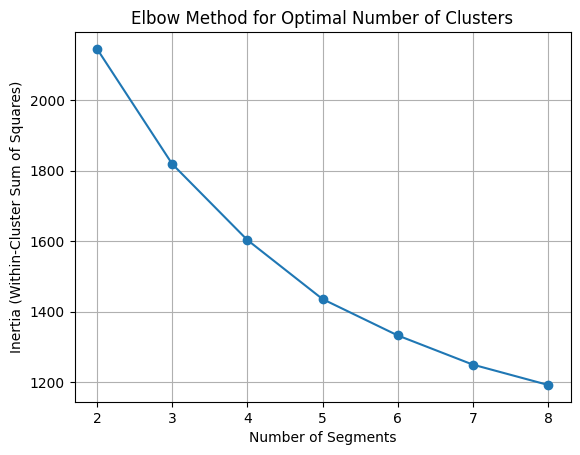

In [11]:
import matplotlib.pyplot as plt

# Extract the number of clusters and inertia (sum of squared distances) for each model
k_values = range(2, 9)
inertia_values = [model.inertia_ for model in all_models]

# Plot the inertia values against the number of clusters
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid()
plt.show()


In [12]:
import numpy as np
from sklearn.utils import resample
from sklearn.cluster import KMeans

# Set the random seed for reproducibility
np.random.seed(1234)

# Function to perform bootstrapping for k-means clustering stability
def boot_kmeans(data, k_range, n_rep=10, n_boot=100):
    stability_results = {k: [] for k in k_range}

    for k in k_range:
        # Run bootstrapping for each value of k
        for _ in range(n_boot):
            # Resample the data
            boot_data = resample(data, random_state=1234)

            # Run k-means with multiple initializations on the bootstrapped sample
            min_inertia = float('inf')
            best_model = None

            for _ in range(n_rep):
                kmeans = KMeans(n_clusters=k, n_init=1, random_state=1234)
                kmeans.fit(boot_data)

                # Keep track of the best inertia for this bootstrap sample
                if kmeans.inertia_ < min_inertia:
                    min_inertia = kmeans.inertia_
                    best_model = kmeans

            # Append the best inertia for this bootstrap sample
            stability_results[k].append(min_inertia)

    return stability_results

# Perform the bootstrapped clustering for k values from 2 to 8
boot_results = boot_kmeans(MD_x, range(2, 9))

# Print out the average inertia per cluster size for comparison
for k, inertia_list in boot_results.items():
    print(f"Cluster {k}: Mean Inertia = {np.mean(inertia_list):.2f}")


Cluster 2: Mean Inertia = 2125.17
Cluster 3: Mean Inertia = 1806.32
Cluster 4: Mean Inertia = 1582.48
Cluster 5: Mean Inertia = 1502.44
Cluster 6: Mean Inertia = 1441.88
Cluster 7: Mean Inertia = 1300.88
Cluster 8: Mean Inertia = 1217.07


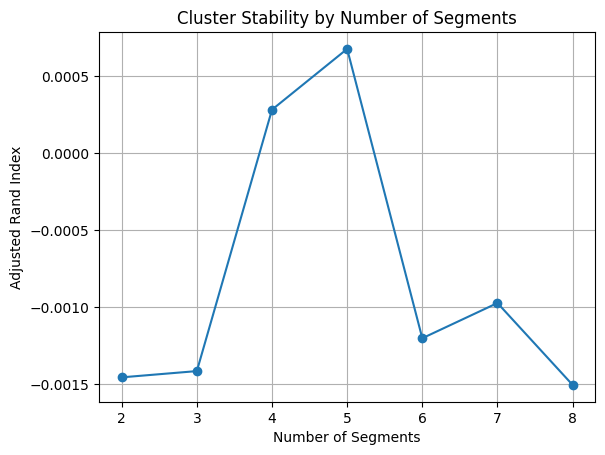

In [13]:
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Function to calculate the stability across bootstrapped samples using ARI
def calculate_ari_stability(data, k_range, n_rep=10, n_boot=100):
    ari_results = {k: [] for k in k_range}

    for k in k_range:
        # Run bootstrapping for each value of k
        for _ in range(n_boot):
            # Resample the data
            boot_data = resample(data, random_state=1234)

            # Run k-means on original and bootstrapped samples
            kmeans_original = KMeans(n_clusters=k, n_init=n_rep, random_state=1234).fit(data)
            kmeans_boot = KMeans(n_clusters=k, n_init=n_rep, random_state=1234).fit(boot_data)

            # Calculate ARI between original and bootstrapped sample clustering
            ari = adjusted_rand_score(kmeans_original.labels_, kmeans_boot.labels_)
            ari_results[k].append(ari)

    # Calculate average ARI for each k
    avg_ari = {k: np.mean(ari_results[k]) for k in k_range}

    return avg_ari

# Perform the ARI stability analysis
k_values = range(2, 9)
ari_stability = calculate_ari_stability(MD_x, k_values)

# Plot the adjusted Rand index for each k
plt.plot(list(ari_stability.keys()), list(ari_stability.values()), marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Cluster Stability by Number of Segments")
plt.grid()
plt.show()


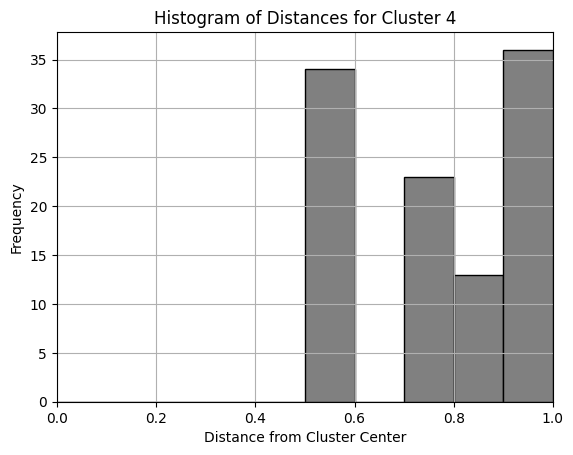

In [14]:
import matplotlib.pyplot as plt

# Assume we want to plot the distribution of distances from cluster 4's center
# Extract the labels and focus on cluster 4
cluster_4_data = MD_x[best_kmeans.labels_ == 3]  # Cluster "4" in R corresponds to index 3 in Python (0-based indexing)

# Calculate distances of points in cluster 4 to its centroid
cluster_4_center = best_kmeans.cluster_centers_[3]
distances = np.linalg.norm(cluster_4_data - cluster_4_center, axis=1)

# Plot the histogram with limits from 0 to 1
plt.hist(distances, bins=10, range=(0, 1), color='grey', edgecolor='black')
plt.xlabel("Distance from Cluster Center")
plt.ylabel("Frequency")
plt.title("Histogram of Distances for Cluster 4")
plt.xlim(0, 1)
plt.grid()
plt.show()


In [15]:
# Extract the data points assigned to cluster 4 (index 3 in Python)
cluster_4_data = MD_x[best_kmeans.labels_ == 3]

# Display or further analyze cluster_4_data as needed
print(cluster_4_data)


[[0 0 0 ... 1 0 1]
 [0 0 0 ... 1 0 1]
 [0 1 1 ... 1 0 1]
 ...
 [0 0 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]]


In [16]:
import numpy as np

# Calculate the centroid for cluster 4 (index 3 in Python)
cluster_4_center = best_kmeans.cluster_centers_[3]

# Calculate the sum of squared within-cluster distances for cluster 4
squared_distances = np.sum((cluster_4_data - cluster_4_center) ** 2)
print("Sum of Squared Distances within Cluster 4:", squared_distances)


Sum of Squared Distances within Cluster 4: 183.5314285714286


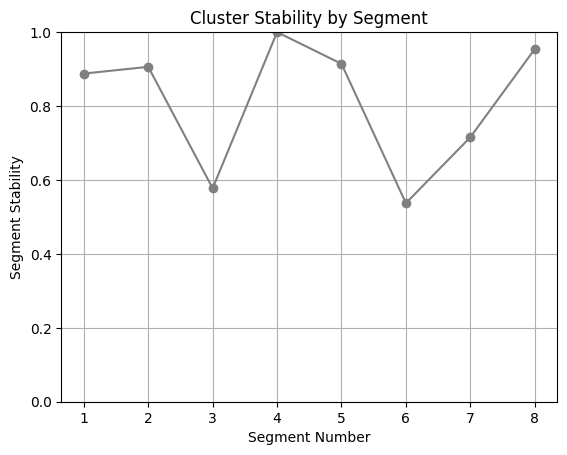

In [17]:
import matplotlib.pyplot as plt

# Calculate sum of squared distances (stability) for each cluster
stability_scores = []
for i in range(best_kmeans.n_clusters):
    cluster_data = MD_x[best_kmeans.labels_ == i]
    cluster_center = best_kmeans.cluster_centers_[i]
    squared_distance = np.sum((cluster_data - cluster_center) ** 2)
    stability_scores.append(squared_distance)

# Normalize stability scores to a 0-1 range for visualization
stability_scores = np.array(stability_scores) / np.max(stability_scores)

# Plot the stability scores with specified y-limits and labels
plt.plot(range(1, best_kmeans.n_clusters + 1), stability_scores, marker='o', color='grey')
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Cluster Stability by Segment")
plt.grid()
plt.show()
